Below is the Python Code for the Space Walk Data from 1965 to 2013 for the United States of America and Russia. 

Extra-vehicular activities are activities done by an astronaut or cosmonaut outside a spacecraft beyond the Earth's appreciable atmosphere.

Need to update Maintenance throughout the code and csv's for spelling errors

In [113]:
# Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [11]:
# Bring in the original CSV file and putting it into a DataFrame.
spacewalkdata = pd.read_csv("eva.csv").to_dict(orient="row")
spacewalkdata_df = pd.DataFrame(spacewalkdata)
spacewalkdata_df.head()

,Country,Crew,Date,Duration,EVA #,Purpose,Vehicle
0,USA,Ed White,06/03/1965,0:36,1.0,First U.S. EVA. Used HHMU and took photos. G...,Gemini IV
1,USA,David Scott,"March 16-17, 1966",0:00,2.0,HHMU EVA cancelled before starting by stuck on...,Gemini VIII
2,USA,Eugene Cernan,06/05/1966,2:07,3.0,"Inadequate restraints, stiff 25ft umbilical an...",Gemini IX-A
3,USA,Mike Collins,07/19/1966,0:50,4.0,Standup EVA. UV photos of stars. Ended by ey...,Gemini X
4,USA,Mike Collins,07/20/1966,0:39,5.0,Retrieved MMOD experiment from docked Agena. ...,Gemini X


In [12]:
# Put Data into the CSV to clean and check in Excel
spacewalkdata_df.to_csv('SpaceWalkAlter.csv')

In [13]:
# Bring in New CSV
# Added "Basic Purpose' column
# When missions had multiple dates cleaned the data to only include the first day.
space_walk_data = pd.read_csv("SpaceWalkAlter2.csv").to_dict(orient="row")

In [20]:
# Reset the dataframe with new CSV
space_walk_data2_df = pd.DataFrame(space_walk_data)
space_walk_data2_df.head()

,Basic Purpose,Country,Crew,Date,Duration,Purpose,Unnamed: 7,Vehicle
0,photo,USA,Ed White,6/3/65,0:36,First U.S. EVA. Used HHMU and took photos. G...,NaN,Gemini IV
1,NaN,USA,David Scott,3/16/66,0:00,HHMU EVA cancelled before starting by stuck on...,NaN,Gemini VIII
2,maintaince,USA,Eugene Cernan,6/5/66,2:07,"Inadequate restraints, stiff 25ft umbilical an...",NaN,Gemini IX-A
3,photo,USA,Mike Collins,7/19/66,0:50,Standup EVA. UV photos of stars. Ended by ey...,NaN,Gemini X
4,photo,USA,Mike Collins,7/20/66,0:39,Retrieved MMOD experiment from docked Agena. ...,NaN,Gemini X


In [21]:
# Reset the index to Vehicle
# Delete random column with no data 'Unnamed: 7'
# Oraganize the DataFrame
del space_walk_data2_df['Unnamed: 7']
swd_df_index = space_walk_data2_df.set_index('Vehicle')
swd_df_index = swd_df_index[['Country', 'Crew', 'Date', 'Duration', 'Purpose','Basic Purpose']]
swd_df_index.head()

,Country,Crew,Date,Duration,Purpose,Basic Purpose
Vehicle,,,,,,
Gemini IV,USA,Ed White,6/3/65,0:36,First U.S. EVA. Used HHMU and took photos. G...,photo
Gemini VIII,USA,David Scott,3/16/66,0:00,HHMU EVA cancelled before starting by stuck on...,NaN
Gemini IX-A,USA,Eugene Cernan,6/5/66,2:07,"Inadequate restraints, stiff 25ft umbilical an...",maintaince
Gemini X,USA,Mike Collins,7/19/66,0:50,Standup EVA. UV photos of stars. Ended by ey...,photo
Gemini X,USA,Mike Collins,7/20/66,0:39,Retrieved MMOD experiment from docked Agena. ...,photo


In [24]:
# Change Duration into DateTime for Calculating Total Time
sw_duration = pd.to_datetime(swd_df_index['Duration'], format="%M:%S")
sw_duration_df = pd.DataFrame(sw_duration)
sw_duration_df.head()

,Duration
Vehicle,
Gemini IV,1900-01-01 00:00:36
Gemini VIII,1900-01-01 00:00:00
Gemini IX-A,1900-01-01 00:02:07
Gemini X,1900-01-01 00:00:50
Gemini X,1900-01-01 00:00:39


In [25]:
# Change Duration into Seconds
sw_duration_df['Seconds'] = (sw_duration_df['Duration'].dt.minute * 60) + sw_duration_df['Duration'].dt.second
sw_duration_df.head()

,Duration,Seconds
Vehicle,,
Gemini IV,1900-01-01 00:00:36,36.0
Gemini VIII,1900-01-01 00:00:00,0.0
Gemini IX-A,1900-01-01 00:02:07,127.0
Gemini X,1900-01-01 00:00:50,50.0
Gemini X,1900-01-01 00:00:39,39.0


In [28]:
# Clean Dataframe to be able to add back in with the Original DataFrame
del sw_duration_df['Duration']
sw_duration_df.head()

118841.0

In [43]:
# Add Space Walk Seconds Column back into DataFrame
space_walk_data = swd_df_index.assign(Space_Walk_Seconds=sw_duration_df.values)
space_walk_data.head()

,Country,Crew,Date,Duration,Purpose,Basic Purpose,Space_Walk_Seconds
Vehicle,,,,,,,
Gemini IV,USA,Ed White,6/3/65,0:36,First U.S. EVA. Used HHMU and took photos. G...,photo,36.0
Gemini VIII,USA,David Scott,3/16/66,0:00,HHMU EVA cancelled before starting by stuck on...,NaN,0.0
Gemini IX-A,USA,Eugene Cernan,6/5/66,2:07,"Inadequate restraints, stiff 25ft umbilical an...",maintaince,127.0
Gemini X,USA,Mike Collins,7/19/66,0:50,Standup EVA. UV photos of stars. Ended by ey...,photo,50.0
Gemini X,USA,Mike Collins,7/20/66,0:39,Retrieved MMOD experiment from docked Agena. ...,photo,39.0


In [45]:
# Create USA Data
usa_data = space_walk_data.groupby(['Country']).get_group('USA')
usa_data.head()

,Country,Crew,Date,Duration,Purpose,Basic Purpose,Space_Walk_Seconds
Vehicle,,,,,,,
Gemini IV,USA,Ed White,6/3/65,0:36,First U.S. EVA. Used HHMU and took photos. G...,photo,36.0
Gemini VIII,USA,David Scott,3/16/66,0:00,HHMU EVA cancelled before starting by stuck on...,NaN,0.0
Gemini IX-A,USA,Eugene Cernan,6/5/66,2:07,"Inadequate restraints, stiff 25ft umbilical an...",maintaince,127.0
Gemini X,USA,Mike Collins,7/19/66,0:50,Standup EVA. UV photos of stars. Ended by ey...,photo,50.0
Gemini X,USA,Mike Collins,7/20/66,0:39,Retrieved MMOD experiment from docked Agena. ...,photo,39.0


In [50]:
# Sum of Total Space Walk Seconds
uu = usa_data.Space_Walk_Seconds.sum()

In [48]:
# Create Russia Data
russia_data = space_walk_data.groupby(['Country']).get_group('Russia')
russia_data.head()

,Country,Crew,Date,Duration,Purpose,Basic Purpose,Space_Walk_Seconds
Vehicle,,,,,,,
Voskhod 2,Russia,Alexei Leonov,3/18/65,0:12,"WorldÂs first EVA, Berkut umbilical suit, Vol...",error,12.0
Soyuz 4&5,Russia,Aleksei Yeliseyov|Yevgeni Khrunov,1/16/69,0:37,"New airlock, Yastreb self-contained life suppo...",maintaince,37.0
Soyuz 12,Russia,Victor Lazerov|Oleg Makarov,9/15/73,0:00,New Orlan D suits checked out inside cabin,demo,0.0
Soyuz 26|Salyut 6,Russia,Yuri Romanenko|Georgi Grechko,12/20/77,1:28,Docking unit inspection. Tested new Orlan D su...,demo,88.0
Soyuz 29|Salyut 6,Russia,Vladimir Kovalyonok|Alexandr Ivanchenkov,7/29/78,2:05,"Replace scientific samples, test new suits",demo,125.0


In [51]:
rr = russia_data.Space_Walk_Seconds.sum()

<Container object of 2 artists>

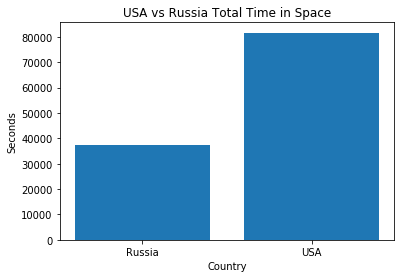

In [52]:
#BarChart of USA vs Russia Total Time in Space
height = [rr, uu]
bars = ('Russia', 'USA')
usa_vs_russia = plt.bar(bars, height)
plt.xlabel('Country')
plt.ylabel('Seconds')
plt.title('USA vs Russia Total Time in Space')
usa_vs_russia

In [54]:
# Bring Back Origninal DataFrame
space_walk_data.head()

,Country,Crew,Date,Duration,Purpose,Basic Purpose,Space_Walk_Seconds
Vehicle,,,,,,,
Gemini IV,USA,Ed White,6/3/65,0:36,First U.S. EVA. Used HHMU and took photos. G...,photo,36.0
Gemini VIII,USA,David Scott,3/16/66,0:00,HHMU EVA cancelled before starting by stuck on...,NaN,0.0
Gemini IX-A,USA,Eugene Cernan,6/5/66,2:07,"Inadequate restraints, stiff 25ft umbilical an...",maintaince,127.0
Gemini X,USA,Mike Collins,7/19/66,0:50,Standup EVA. UV photos of stars. Ended by ey...,photo,50.0
Gemini X,USA,Mike Collins,7/20/66,0:39,Retrieved MMOD experiment from docked Agena. ...,photo,39.0


In [55]:
# Clean Data for Graphing

del space_walk_data['Crew']
del space_walk_data['Date']
del space_walk_data['Purpose']
del space_walk_data['Duration']

In [56]:
# Review DataFrame
space_walk_data.head()

,Country,Basic Purpose,Space_Walk_Seconds
Vehicle,,,
Gemini IV,USA,photo,36.0
Gemini VIII,USA,NaN,0.0
Gemini IX-A,USA,maintaince,127.0
Gemini X,USA,photo,50.0
Gemini X,USA,photo,39.0


In [57]:
# Make sure I am calulating correct dtype
# space_walk_data.dtypes

Country                object
Basic Purpose          object
Space_Walk_Seconds    float64
dtype: object

In [79]:
# USA Basic Purpose Sort
usa_data_basic = space_walk_data.groupby(['Country']).get_group('USA')
usa_data_basic.head()

,Country,Basic Purpose,Space_Walk_Seconds
Vehicle,,,
Gemini IV,USA,photo,36.0
Gemini VIII,USA,NaN,0.0
Gemini IX-A,USA,maintaince,127.0
Gemini X,USA,photo,50.0
Gemini X,USA,photo,39.0


In [88]:
# GroupBy 'Basic Purpose' for USA
df_usa_photo = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('photo'))
df_usa_maintaince = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('maintaince'))
df_usa_install = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('install'))
df_usa_research = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('research'))
df_usa_moonwalk = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('moon walk'))
df_usa_demo = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('demo'))
#df_usa_experiment = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('experiment'))
df_usa_error = pd.DataFrame(usa_data_basic.groupby(['Basic Purpose']).get_group('error'))

#print(df_usa_photo, df_usa_maintaince, df_usa_install, df_usa_research, df_usa_moonwalk, df_usa_demo, df_usa_error)

In [93]:
# Set Variables for Sum Values and Print
usa_photo_seconds_total = df_usa_photo.Space_Walk_Seconds.sum()
usa_maintaince_seconds_total = df_usa_maintaince.Space_Walk_Seconds.sum()
usa_install_seconds_total = df_usa_install.Space_Walk_Seconds.sum()
usa_research_seconds_total = df_usa_research.Space_Walk_Seconds.sum()
usa_moonwalk_seconds_total = df_usa_moonwalk.Space_Walk_Seconds.sum()
usa_demo_seconds_total = df_usa_demo.Space_Walk_Seconds.sum()
usa_error_seconds_total = df_usa_error.Space_Walk_Seconds.sum()

print("Total Number of Seconds for USA Taking Photos:",usa_photo_seconds_total)
print("Total Number of Seconds for USA Doing Maintaince:",usa_maintaince_seconds_total)
print("Total Number of Seconds for USA Installing Equipment:",usa_install_seconds_total)
print("Total Number of Seconds for USA Doing Research:",usa_research_seconds_total)
print("Total Number of Seconds for USA Moonwalk:",usa_moonwalk_seconds_total)
print("Total Number of Seconds for USA Doing Demo's:",usa_demo_seconds_total)
print("Total Number of Seconds for USA Errors:",usa_error_seconds_total)

Total Number of Seconds for USA Taking Photos: 2195.0
Total Number of Seconds for USA Doing Maintaince: 58306.0
Total Number of Seconds for USA Installing Equipment: 10081.0
Total Number of Seconds for USA Doing Research: 4561.0
Total Number of Seconds for USA Moonwalk: 152.0
Total Number of Seconds for USA Doing Demo's: 3188.0
Total Number of Seconds for USA Errors: 0.0


In [94]:
# Russia Basic Purpose Sort
russia_data_basic = space_walk_data.groupby(['Country']).get_group('Russia')
russia_data_basic.head()

,Country,Basic Purpose,Space_Walk_Seconds
Vehicle,,,
Voskhod 2,Russia,error,12.0
Soyuz 4&5,Russia,maintaince,37.0
Soyuz 12,Russia,demo,0.0
Soyuz 26|Salyut 6,Russia,demo,88.0
Soyuz 29|Salyut 6,Russia,demo,125.0


In [95]:
# GroupBy 'Basic Purpose' for Russia
df_russia_photo = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('photo'))
df_russia_maintaince = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('maintaince'))
df_russia_install = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('install'))
df_russia_research = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('research'))
#df_russia_moonwalk = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('moon walk'))
df_russia_demo = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('demo'))
df_russia_experiment = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('experiment'))
df_russia_error = pd.DataFrame(russia_data_basic.groupby(['Basic Purpose']).get_group('error'))

#print(df_russia_photo, df_russia_maintaince, df_russia_install, df_russia_research, df_russia_experiment, df_russia_demo, df_russia_error)

In [96]:
# Set Variables for Sum Values and Print
russia_photo_seconds_total = df_russia_photo.Space_Walk_Seconds.sum()
russia_maintaince_seconds_total = df_russia_maintaince.Space_Walk_Seconds.sum()
russia_install_seconds_total = df_russia_install.Space_Walk_Seconds.sum()
russia_research_seconds_total = df_russia_research.Space_Walk_Seconds.sum()
#russia_moonwalk_seconds_total = df_russia_moonwalk.Space_Walk_Seconds.sum()
russia_demo_seconds_total = df_russia_demo.Space_Walk_Seconds.sum()
russia_error_seconds_total = df_russia_error.Space_Walk_Seconds.sum()
russia_experiment_seconds = df_russia_experiment.Space_Walk_Seconds.sum()

print("Total Number of Seconds for Russia Taking Photos:",russia_photo_seconds_total)
print("Total Number of Seconds for Russia Doing Maintaince:",russia_maintaince_seconds_total)
print("Total Number of Seconds for Russia Installing Equipment:",russia_install_seconds_total)
print("Total Number of Seconds for Russia Doing Research:",russia_research_seconds_total)
print("Total Number of Seconds for Russia Doing Demo's:",russia_demo_seconds_total)
print("Total Number of Seconds for Russia Errors:",russia_error_seconds_total)
print("Total Number of Seconds for Russia Doing Experiments:",russia_experiment_seconds)

Total Number of Seconds for Russia Taking Photos: 864.0
Total Number of Seconds for Russia Doing Maintaince: 21074.0
Total Number of Seconds for Russia Installing Equipment: 12874.0
Total Number of Seconds for Russia Doing Research: 784.0
Total Number of Seconds for Russia Doing Demo's: 1293.0
Total Number of Seconds for Russia Errors: 26.0
Total Number of Seconds for Russia Doing Errors: 322.0


In [117]:
# Traces for the Stacked BarChart with Plotly
trace1 = go.Bar(
    x=['USA', 'Russia'],
    y=[russia_photo_seconds_total, russia_photo_seconds_total],
    name='Photos'
)
trace2 = go.Bar(
    x=['USA', 'Russia'],
    y=[russia_photo_seconds_total, russia_maintaince_seconds_total],
    name='Maintaince'
)
trace3 = go.Bar(
    x=['USA', 'Russia'],
    y=[russia_photo_seconds_total, russia_install_seconds_total],
    name='Installing Equipment'
)
trace4 = go.Bar(
    x=['USA', 'Russia'],
    y=[russia_photo_seconds_total, russia_research_seconds_total],
    name='Research'
)
trace5 = go.Bar(
    x=['USA', 'Russia'],
    y=[russia_photo_seconds_total, russia_demo_seconds_total],
    name='Demos'
)
trace6 = go.Bar(
    x=['USA', 'Russia'],
    y=[russia_photo_seconds_total, russia_error_seconds_total],
    name='Errors'
)
trace7 = go.Bar(
    x=['USA', 'Russia'],
    y=[russia_photo_seconds_total, russia_experiment_seconds],
    name='Experiments'
)
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.